# Lab 2 (Due @ the end of class via Canvas/Gradescope)

## Part 1: Group Work (8 points: 2 pts each)

Break up into groups of 4-5 (either in-person or within breakout rooms; depending on if we are in-person or virtual). Everyone in the group is going to build the same data frame, after having collected some data together. To collect the data, you will need to access [typingtest.com](typingtest.com) and be prepared to record your results. The final data frame should look like (for example, with 4 group members):

| name         | easy2 | medium2 | hard2 |
|--------------|-------|---------|-------|
|  Person 1    |       |         |       |
|  Person 2    |       |         |       |
|  Person 3    |       |         |       |
|  Person 4    |       |         |       |

Each person will take from [typingtest.com](typingtest.com):
- a single **2 minute** test on **Easy** difficulty, recording the **Net WPM**
- a single **2 minute** test on **Medium** difficulty, recording the **Net WPM**
- a single **2 minute** test on **Hard** difficulty, recording the **Net WPM**

You may record your results by hand and paper, or in an excel sheet.

Some **Notes:**
- `name` should be the index, not a feature column
- the first thing you should do is import both `numpy` and `pandas`

### (a) Create the data frame using an array, print it to show it worked.

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# general process is (could be multiple solutions)
dat_array = np.array([[1,2,3],
                    [4,5,6],
                    [7,8,9],
                    [10,11,12]])

type_df = pd.DataFrame(dat_array)
type_df.columns = ['easy2', 'medium2', 'hard2']
type_df.index = ['person1', 'person2', 'person3', 'person4']
type_df

,easy2,medium2,hard2
person1,1,2,3
person2,4,5,6
person3,7,8,9
person4,10,11,12


### (b) Create the data frame using a dictionary, print it to show it worked.

In [2]:
# general process is (could be multiple solutions)
dat_dict = {'person1': [1,2,3],
           'person2': [4,5,6],
           'person3': [7,8,9],
           'person4': [10,11,12]}

type_df = pd.DataFrame(dat_dict, index=('easy2','medium2','hard2')).T
type_df

,easy2,medium2,hard2
person1,1,2,3
person2,4,5,6
person3,7,8,9
person4,10,11,12


### (c) Calculate:

- (i) The average net speed for each person
- (ii) The average net speed for each difficulty level

In [3]:
# means for each person
type_df.mean(axis=1)

person1     2.0
person2     5.0
person3     8.0
person4    11.0
dtype: float64

In [4]:
# means for each difficulty level
type_df.mean(axis=0)

easy2      5.5
medium2    6.5
hard2      7.5
dtype: float64

### (d) Have each member of the group take the *5 minutes* test on *Easy* difficulty, then add this new column of data (call it `easy5`) onto your existing data frame. Print it to show it worked.

In [5]:
# general process using a dict
new_dat = pd.Series({'person1': 13,
          'person2': 14,
          'person3': 15,
          'person4': 16})

type_df['easy5'] = new_dat
type_df

,easy2,medium2,hard2,easy5
person1,1,2,3,13
person2,4,5,6,14
person3,7,8,9,15
person4,10,11,12,16


## Part 2: Working with Data (17 points)

Download the `pseudo_facebook.csv` file from the Labs Module on Canvas. This data set contains some demographic information from a subset of Facebook users ([Source](https://www.kaggle.com/datasets/sheenabatra/facebook-data)). You will use this data set to complete this part of the lab. You may continue working/discussing these problems in your group if you wish.

### (a: 3 points) Read the data into your notebook using Pandas, making the `userid` column the index. Print it to show it worked.

In [6]:
import pandas as pd

fb_df = pd.read_csv('pseudo_facebook.csv', index_col='userid')
fb_df.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### (b: 4 points) Use the `.describe()` function to get a sense of the data. In a markdown cell, discuss at least (2) of the features and what the data tell you (For example: think critically about what the average `age` might mean, or what the difference in `mobile_likes` and `www_likes` means; there are numerous takeaways you might have).

In [7]:
fb_df.describe()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


Two examples: We can see that the average age of the users in the data set is 37.28 years old, with the youngest being 13 and the oldest being 113, with a median age of 28, suggesting that Facebook is more popular among post-education population. We also see that most likes are mobile likes as opposed to www likes, suggesting that more users interact with Facebook on their mobile devices than their computers/browser.

### (c: 4 points) Create three new columns for the data frame:
- (i) `prop_init`: The proportion of friends that were initiated by the user: $\frac{\text{friendships_initiated}}{\text{friend_count}}$
- (ii) `prop_mob_likes`: The proportion of likes that were mobile: $\frac{\text{mobile_likes}}{\text{likes}}$
- (iii) `prop_www_likes`: The proportion of likes that were `www`: $\frac{\text{www_likes}}{\text{likes}}$

Print the **last** few rows of the new data set that includes these columns.

In [8]:
fb_df['prop_init'] = fb_df['friendships_initiated']/fb_df['friend_count']
fb_df['prop_mob_likes'] = fb_df['mobile_likes']/fb_df['likes']
fb_df['prop_www_likes'] = fb_df['www_likes']/fb_df['likes']

fb_df.tail()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,prop_init,prop_mob_likes,prop_www_likes
userid,,,,,,,,,,,,,,,,,
1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,0.161001,0.877127,0.122873
1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,0.873984,0.999546,0.000454
1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,0.761239,1.000000,0.000000
1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,0.072266,1.000000,0.000000
1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,0.374817,1.000000,0.000000


### (d: 3 points) The code below will generate a histogram of the birth month for all users in the data set. Run it and then in a markdown cell, comment on what you think the reason is that January has more births than any other month?

Text(0, 0.5, 'count')

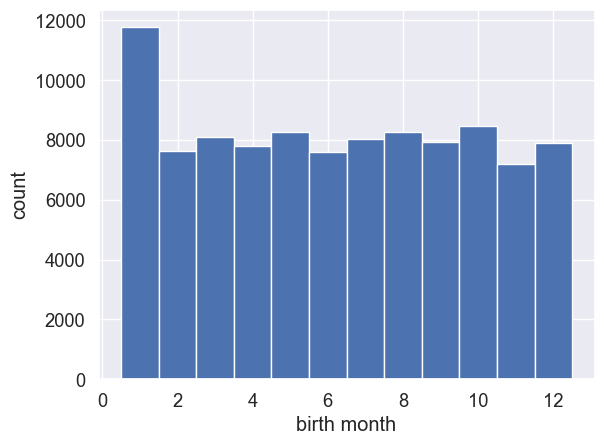

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 
sns.set(font_scale=1.2)

bins = np.linspace(0.5, 12.5, 13)
plt.hist(fb_df['dob_month'], bins=bins)
plt.xlabel('birth month')
plt.ylabel('count')

I believe the reason that January has the most births in the Facebook data is because it is the default and many users likely did not bother to set their birth date/month when creating their profile.

### (e: 3 points) Adapt the code from (d) to create two histograms, one each for `prop_mob_likes` and `prop_www_likes` (which you created in (c)). Then, in a markdown cell, comment on the shapes of the two histograms and what they mean practically.

**Notes**:
- for your bins, use `np.linspace(0, 1, 11)`.
- if you plot the histograms in the same python cell, they will be placed on top of each other (you can try and see what this looks like if you wish), but for readability, please create them in separate cells.

Text(0, 0.5, 'count')

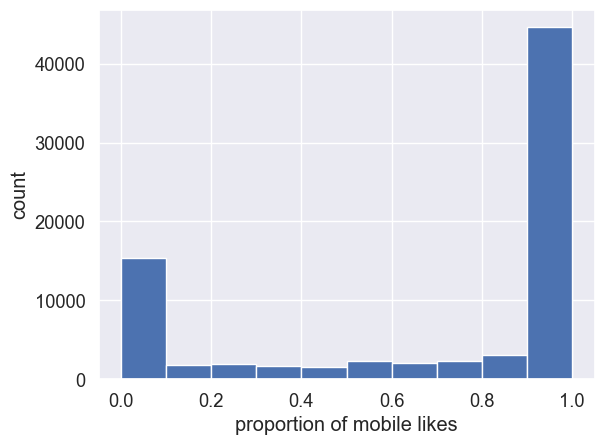

In [10]:
bins = np.linspace(0, 1, 11)
plt.hist(fb_df['prop_mob_likes'], bins=bins)
plt.xlabel('proportion of mobile likes')
plt.ylabel('count')

Text(0, 0.5, 'count')

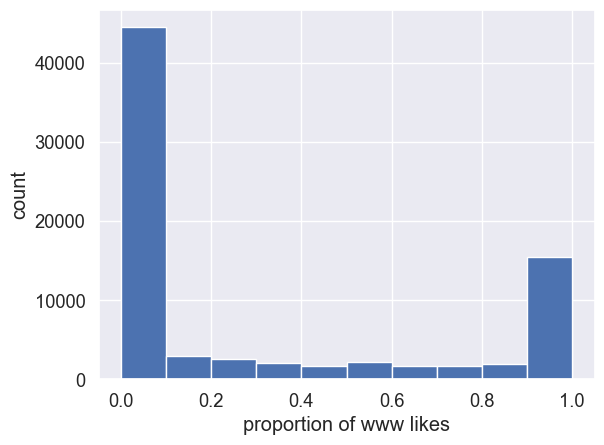

In [11]:
plt.hist(fb_df['prop_www_likes'], bins=bins)
plt.xlabel('proportion of www likes')
plt.ylabel('count')

It looks likes (as we saw in the data) more people interact with Facebook via mobile devices than the browser, but it also seems that most users only use one or the other, and not nearly as many use both.